In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

# Loading the US_contracts.csv data from DefenseNews

file_path = '/Users/RobertHolzmann/Downloads/Blogpost/Datasets/US_contracts.csv'


df = pd.read_csv(file_path)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   This Year's Rank                    5 non-null      int64  
 1   Company                             5 non-null      object 
 2   Country                             5 non-null      object 
 3   2023 Defense Revenue (in billions)  5 non-null      object 
 4   2023 US Contracts (in billions)     5 non-null      object 
 5   2022 Defense Revenue (in billions)  5 non-null      object 
 6   2022 US Contracts (in billions)     5 non-null      object 
 7   2021 Defense Revenue (in billions)  5 non-null      object 
 8   Revenue From Defense                5 non-null      object 
 9   Unnamed: 9                          0 non-null      float64
 10  Unnamed: 10                         0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 

In [13]:
# Delete blank columns from df
df = df.drop('Unnamed: 9', axis=1)
df = df.drop('Unnamed: 10', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   This Year's Rank                    5 non-null      int64 
 1   Company                             5 non-null      object
 2   Country                             5 non-null      object
 3   2023 Defense Revenue (in billions)  5 non-null      object
 4   2023 US Contracts (in billions)     5 non-null      object
 5   2022 Defense Revenue (in billions)  5 non-null      object
 6   2022 US Contracts (in billions)     5 non-null      object
 7   2021 Defense Revenue (in billions)  5 non-null      object
 8   Revenue From Defense                5 non-null      object
dtypes: int64(1), object(8)
memory usage: 492.0+ bytes


In [15]:
# Format currency/revenue columns by removing '$' and converting to float dtypes

df['2023 Defense Revenue (in billions)'] = df['2023 Defense Revenue (in billions)'].replace('[\$]', '', regex=True).astype(float)
df['2023 US Contracts (in billions)'] = df['2023 US Contracts (in billions)'].replace('[\$]', '', regex=True).astype(float)
df['2022 Defense Revenue (in billions)'] = df['2022 Defense Revenue (in billions)'].replace('[\$]', '', regex=True).astype(float)
df['2022 US Contracts (in billions)'] = df['2022 US Contracts (in billions)'].replace('[\$]', '', regex=True).astype(float)
df['2021 Defense Revenue (in billions)'] = df['2021 Defense Revenue (in billions)'].replace('[\$]', '', regex=True).astype(float)
df['Revenue From Defense'] = df['Revenue From Defense'].replace('[\%]', '', regex=True).astype(float) / 100

In [16]:
df.head()

,This Year's Rank,Company,Country,2023 Defense Revenue (in billions),2023 US Contracts (in billions),2022 Defense Revenue (in billions),2022 US Contracts (in billions),2021 Defense Revenue (in billions),Revenue From Defense
0,1,Lockheed Martin,U.S.,67.6,49.2,63.3,46.2,64.5,0.96
1,2,RTX,U.S.,40.6,27.8,39.6,26.1,41.9,0.59
2,3,Northrop Grumman,U.S.,35.2,15.1,32.4,13.8,31.4,0.89
3,4,General Dynamics,U.S.,33.7,23.0,30.4,21.6,30.8,0.77
4,5,Boeing,U.S.,32.7,21.8,30.8,14.8,35.1,0.46


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   This Year's Rank                    5 non-null      int64  
 1   Company                             5 non-null      object 
 2   Country                             5 non-null      object 
 3   2023 Defense Revenue (in billions)  5 non-null      float64
 4   2023 US Contracts (in billions)     5 non-null      float64
 5   2022 Defense Revenue (in billions)  5 non-null      float64
 6   2022 US Contracts (in billions)     5 non-null      float64
 7   2021 Defense Revenue (in billions)  5 non-null      float64
 8   Revenue From Defense                5 non-null      float64
dtypes: float64(6), int64(1), object(2)
memory usage: 492.0+ bytes


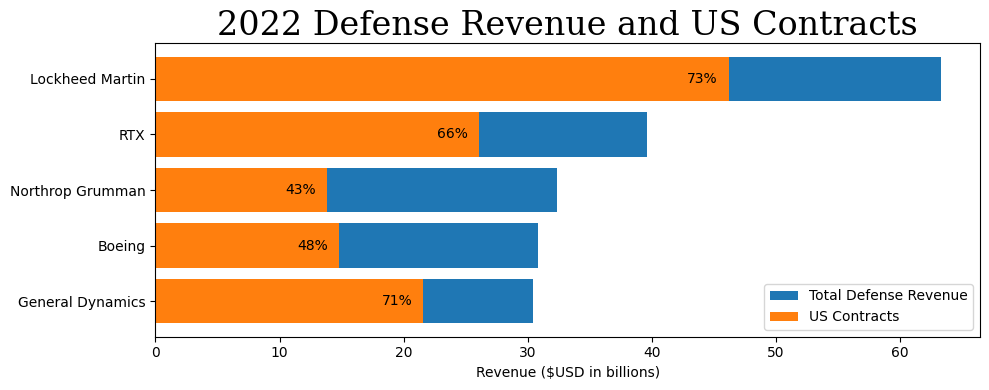

In [29]:

# Sort the DataFrame by the 'Company' column in reverse order
df = df.sort_values('2022 Defense Revenue (in billions)', ascending=True)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 4))



# Calculate the percentage of US contracts
df['US_Contracts_Percent_2022'] = (df['2022 US Contracts (in billions)'] / df['2022 Defense Revenue (in billions)']) * 100

# Plotting the total defense revenue
total = ax.barh(df['Company'], df['2022 Defense Revenue (in billions)'], label='Total Defense Revenue')

# Plotting the US contracts portion
us_contracts = ax.barh(df['Company'], df['2022 US Contracts (in billions)'], label='US Contracts')

font = {'family': 'serif',
        'weight': 'normal',
        'size': 24
       }

# Adding labels and title
ax.set_title('2022 Defense Revenue and US Contracts', fontdict=font)
ax.set_xlabel('Revenue ($USD in billions)', fontsize = 10)
ax.set_ylabel('')
ax.legend()

for bar, percentage in zip(us_contracts, df['US_Contracts_Percent_2022']):
    width = bar.get_width()
    ax.annotate(f'{percentage:.0f}%',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(-8, 0),  # -8 points horizontal offset
                textcoords='offset points',
                ha='right', va='center'
                )

# Display the plot
plt.tight_layout()
plt.show()


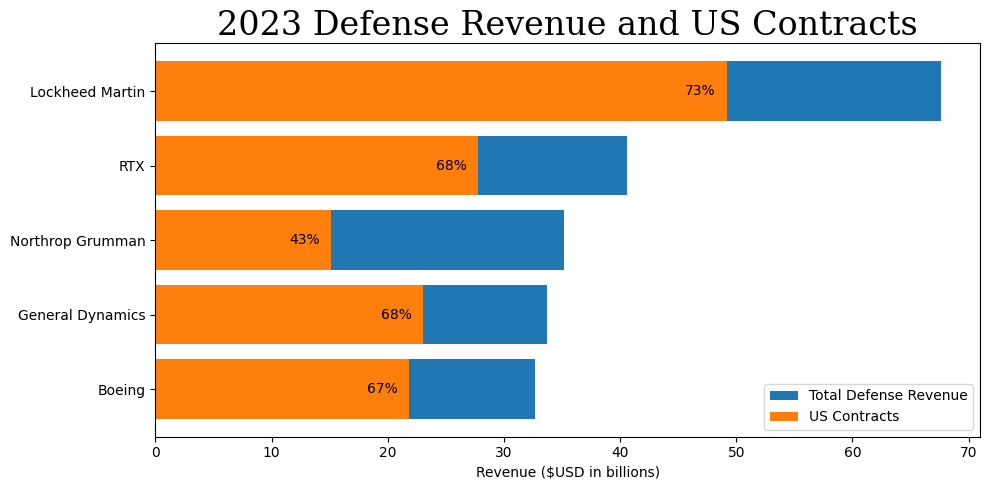

In [33]:

# Sort the DataFrame by the 'Company' column in reverse order
df = df.sort_values('2023 Defense Revenue (in billions)', ascending=True)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))



# Calculate the percentage of US contracts
df['US_Contracts_Percent_2023'] = (df['2023 US Contracts (in billions)'] / df['2023 Defense Revenue (in billions)']) * 100

# Plotting the total defense revenue
total = ax.barh(df['Company'], df['2023 Defense Revenue (in billions)'], label='Total Defense Revenue')

# Plotting the US contracts portion
us_contracts = ax.barh(df['Company'], df['2023 US Contracts (in billions)'], label='US Contracts')

font = {'family': 'serif',
        'weight': 'normal',
        'size': 24
       }

# Adding labels and title
ax.set_title('2023 Defense Revenue and US Contracts', fontdict=font)
ax.set_xlabel('Revenue ($USD in billions)', fontsize = 10)
ax.set_ylabel('')
ax.legend()

for bar, percentage in zip(us_contracts, df['US_Contracts_Percent_2023']):
    width = bar.get_width()
    ax.annotate(f'{percentage:.0f}%',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(-8, 0),  # -8 points horizontal offset
                textcoords='offset points',
                ha='right', va='center'
                )

# Display the plot
plt.tight_layout()
plt.show()